In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import matplotlib.cm as cm
import sklearn
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.decomposition import PCA

data=pd.read_csv("/Users/Cristy/Downloads/task2/X_train.csv")
labels=pd.read_csv("/Users/Cristy/Downloads/task2/y_train.csv")
data['labels']=pd.Series(labels['y'])
data.drop(columns='id',inplace=True)

std_data=data.loc[:,~data.columns.isin(['labels'])].apply(lambda x: (x-x.mean())/x.std())
std_data['labels']=data['labels']



In [6]:
## correlated features
corr_feats=set()
corr_matrix=std_data.drop(columns='labels').corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.8:
            correlated=corr_matrix.columns[i]
            corr_feats.add(correlated)
        
data_uncorr=std_data.drop(columns=corr_feats)
print(std_data.shape,data_uncorr.shape)

(4800, 1001) (4800, 964)


In [16]:
corr_feats

{'x142',
 'x144',
 'x196',
 'x222',
 'x233',
 'x279',
 'x311',
 'x345',
 'x362',
 'x371',
 'x373',
 'x399',
 'x419',
 'x498',
 'x504',
 'x507',
 'x532',
 'x640',
 'x686',
 'x705',
 'x746',
 'x794',
 'x807',
 'x812',
 'x821',
 'x840',
 'x875',
 'x878',
 'x884',
 'x898',
 'x904',
 'x907',
 'x937',
 'x940',
 'x972',
 'x983',
 'x995'}

## Model 1

PCA+SVM rbf

In [19]:
pca = PCA(n_components = 0.8)
## Cross-validation
data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels
kf=KFold(10,shuffle=True)
folds=kf.split(data)
i=0
test_scores=[]
train_scores=[]
for train_index, test_index in folds:
    X_train=data.values[train_index]
    X_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    pca.fit(pd.DataFrame(X_train))
    X_trainpca=pca.transform(pd.DataFrame(X_train))
    svm_mod=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(X_trainpca,y_train)
    train_pred=svm_mod.predict(X_trainpca)
    train_score=balanced_accuracy_score(y_train,train_pred)
    train_scores.append(train_score)
    i+=1
    print("Fold: {}\n Train score: {}".format(i,train_score))
    X_testpca=pca.transform(X_test)
    test_pred=svm_mod.predict(X_testpca)
    test_score=balanced_accuracy_score(y_test,test_pred)
    print("Test score: {}".format(test_score))
    test_scores.append(test_score)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

    

Fold: 1
 Train score: 0.8671920014514996
Test score: 0.6921497576436747
Fold: 2
 Train score: 0.8649193195970012
Test score: 0.6838448869676462
Fold: 3
 Train score: 0.8639719804671445
Test score: 0.6898984235652083
Fold: 4
 Train score: 0.871442928058201
Test score: 0.7215141612200435
Fold: 5
 Train score: 0.8634014909783652
Test score: 0.7038768010143818
Fold: 6
 Train score: 0.8698656678711992
Test score: 0.6540622512162239
Fold: 7
 Train score: 0.8648459314231053
Test score: 0.690289340718874
Fold: 8
 Train score: 0.8635577746275699
Test score: 0.6417681286179241
Fold: 9
 Train score: 0.8631216744214445
Test score: 0.6856617042952445
Fold: 10
 Train score: 0.8636148184257699
Test score: 0.7227357223113687
Mean train score: 0.8655933587321301
 Mean test score:0.688580117757059


## Same model, stratified kfold

In [5]:
pca = PCA(n_components = 0.8)
## Cross-validation
data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels
kf=StratifiedKFold(10,shuffle=True)
folds=kf.split(data,labels)
i=0
test_scores=[]
train_scores=[]
for train_index, test_index in folds:
    X_train=data.values[train_index]
    X_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    pca.fit(pd.DataFrame(X_train))
    X_trainpca=pca.transform(pd.DataFrame(X_train))
    svm_mod=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(X_trainpca,y_train)
    train_pred=svm_mod.predict(X_trainpca)
    train_score=balanced_accuracy_score(y_train,train_pred)
    train_scores.append(train_score)
    i+=1
    print("Fold: {}\n Train score: {}".format(i,train_score))
    X_testpca=pca.transform(X_test)
    test_pred=svm_mod.predict(X_testpca)
    test_score=balanced_accuracy_score(y_test,test_pred)
    print("Test score: {}".format(test_score))
    test_scores.append(test_score)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

   

Fold: 1
 Train score: 0.8477366255144032
Test score: 0.6935185185185185
Fold: 2
 Train score: 0.8494855967078189
Test score: 0.6712962962962963
Fold: 3
 Train score: 0.8481481481481481
Test score: 0.7018518518518518
Fold: 4
 Train score: 0.8487654320987654
Test score: 0.7046296296296296
Fold: 5
 Train score: 0.8495884773662551
Test score: 0.7037037037037037
Fold: 6
 Train score: 0.8473251028806584
Test score: 0.65
Fold: 7
 Train score: 0.8476337448559671
Test score: 0.6462962962962963
Fold: 8
 Train score: 0.8437242798353909
Test score: 0.7055555555555556
Fold: 9
 Train score: 0.8482510288065844
Test score: 0.725
Fold: 10
 Train score: 0.8521604938271605
Test score: 0.6805555555555555
Mean train score: 0.8521604938271605
 Mean test score:0.6805555555555555


features with corr < 0.7

In [17]:
## correlated features
corr_feats=set()
corr_matrix=std_data.drop(columns='labels').corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.7:
            correlated=corr_matrix.columns[i]
            corr_feats.add(correlated)
        
data_uncorr=std_data.drop(columns=corr_feats)
print(std_data.shape,data_uncorr.shape)

(4800, 1001) (4800, 771)


In [18]:
pca = PCA(n_components = 0.8)
## Cross-validation
data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels
kf=KFold(10,shuffle=True)
folds=kf.split(data)
i=0
test_scores=[]
train_scores=[]
for train_index, test_index in folds:
    X_train=data.values[train_index]
    X_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    pca.fit(pd.DataFrame(X_train))
    X_trainpca=pca.transform(pd.DataFrame(X_train))
    svm_mod=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(X_trainpca,y_train)
    train_pred=svm_mod.predict(X_trainpca)
    train_score=balanced_accuracy_score(y_train,train_pred)
    train_scores.append(train_score)
    i+=1
    print("Fold: {}\n Train score: {}".format(i,train_score))
    X_testpca=pca.transform(X_test)
    test_pred=svm_mod.predict(X_testpca)
    test_score=balanced_accuracy_score(y_test,test_pred)
    print("Test score: {}".format(test_score))
    test_scores.append(test_score)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))


Fold: 1
 Train score: 0.8660552735993153
Test score: 0.6930640770059547
Fold: 2
 Train score: 0.8647786215108471
Test score: 0.6443490352762109
Fold: 3
 Train score: 0.8625996937341499
Test score: 0.7264541602178146
Fold: 4
 Train score: 0.8652879121749001
Test score: 0.7238417828122975
Fold: 5
 Train score: 0.8636138558401111
Test score: 0.7164327094474153
Fold: 6
 Train score: 0.8675646388347252
Test score: 0.6626750823720992
Fold: 7
 Train score: 0.8654240144153462
Test score: 0.6903782280937453
Fold: 8
 Train score: 0.8612530242817075
Test score: 0.6810393262181024
Fold: 9
 Train score: 0.8782336704985872
Test score: 0.6448607761476222
Fold: 10
 Train score: 0.8619352532878849
Test score: 0.7441771475197658
Mean train score: 0.8619352532878849
 Mean test score:0.7441771475197658


## Model 2

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
data=data_uncorr.drop(columns='labels')
labels=data_uncorr['labels']
lda = LinearDiscriminantAnalysis()
#X_lda = lda.fit_transform(data, labels)


kf=KFold(n_splits=10,shuffle=True)
folds=kf.split(data)
train_scores=[]
test_scores=[]
i=0
for train_index, test_index in folds:
    X_train=data.values[train_index]
    X_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    X_lda=lda.fit_transform(X_train,y_train)
    dt=DecisionTreeClassifier(class_weight='balanced')
    dt.fit(X_lda,y_train)
    # Training 
    train_preds=dt.predict(X_lda)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    # Testing
    X_testlda=lda.transform(X_test)
    test_preds=dt.predict(X_testlda)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score:{}\n Mean test score: {}".format(np.mean(train_scores),np.mean(test_scores)))    
    

Fold 1
 Train score: 1.0
Test score:0.5887438898868577
Fold 2
 Train score: 1.0
Test score:0.5711383191562998
Fold 3
 Train score: 1.0
Test score:0.5751305562086334
Fold 4
 Train score: 1.0
Test score:0.5928991581839315
Fold 5
 Train score: 1.0
Test score:0.5880361138047522
Fold 6
 Train score: 1.0
Test score:0.5702818732269882
Fold 7
 Train score: 1.0
Test score:0.5713099415204679
Fold 8
 Train score: 1.0
Test score:0.5937486480640277
Fold 9
 Train score: 1.0
Test score:0.5376720980169256
Fold 10
 Train score: 1.0
Test score:0.6104272886640706
Mean train score:1.0
 Mean test score: 0.5799387886732955


## stratified kfold

In [7]:
data=data_uncorr.drop(columns='labels')
labels=data_uncorr['labels']
lda = LinearDiscriminantAnalysis()
#X_lda = lda.fit_transform(data, labels)


kf=StratifiedKFold(n_splits=10,shuffle=True)
folds=kf.split(data,labels)
train_scores=[]
test_scores=[]
i=0
for train_index, test_index in folds:
    X_train=data.values[train_index]
    X_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    X_lda=lda.fit_transform(X_train,y_train)
    dt=DecisionTreeClassifier(class_weight='balanced')
    dt.fit(X_lda,y_train)
    # Training 
    train_preds=dt.predict(X_lda)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    # Testing
    X_testlda=lda.transform(X_test)
    test_preds=dt.predict(X_testlda)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score:{}\n Mean test score: {}".format(np.mean(train_scores),np.mean(test_scores)))    
    

Fold 1
 Train score: 1.0
Test score:0.6111111111111112
Fold 2
 Train score: 1.0
Test score:0.5583333333333332
Fold 3
 Train score: 1.0
Test score:0.5861111111111111
Fold 4
 Train score: 1.0
Test score:0.6185185185185186
Fold 5
 Train score: 1.0
Test score:0.5648148148148149
Fold 6
 Train score: 1.0
Test score:0.5555555555555556
Fold 7
 Train score: 1.0
Test score:0.612037037037037
Fold 8
 Train score: 1.0
Test score:0.5583333333333332
Fold 9
 Train score: 1.0
Test score:0.5851851851851851
Fold 10
 Train score: 1.0
Test score:0.5740740740740741
Mean train score:1.0
 Mean test score: 0.5824074074074075


## Model 3

In [8]:
data=data_uncorr.drop(columns='labels')
labels=data_uncorr['labels']
#X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=1)
#lda.fit(data,labels)
#X_train_lda=lda.transform(X_train)
#svm1=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced')
#svm1.fit(X_train_lda,y_train)

#train_pred=svm1.predict(X_train_lda)
#print('Train score:', balanced_accuracy_score(y_train,train_pred))

#X_test=lda.transform(X_test)
#test_pred=svm1.predict(X_test)
#print('Test score:', balanced_accuracy_score(y_test,test_pred))



lda = LinearDiscriminantAnalysis()
# Cross validation
kf=KFold(n_splits=10)
folds=kf.split(data)
train_scores=[]
test_scores=[]
i=0
for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    x_trainlda=lda.fit_transform(x_train,y_train)
    svm1=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_trainlda,y_train)
    
    #training scores
    train_preds=svm1.predict(x_trainlda)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    train_scores.append(trainscore)
    i+=1
    print("Fold {}\n Train score:{}".format(i,trainscore))
    
    #testing scores
    x_testlda=lda.transform(x_test)
    test_preds=svm1.predict(x_testlda)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}\n".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))
    


Fold 1
 Train score:0.8432457920926492
Test score:0.6383856117353308

Fold 2
 Train score:0.8420819618282209
Test score:0.6729478692270372

Fold 3
 Train score:0.8382979045966014
Test score:0.6443024855371511

Fold 4
 Train score:0.8413552003262111
Test score:0.6266109908237962

Fold 5
 Train score:0.8383946919429257
Test score:0.6500240760804141

Fold 6
 Train score:0.8306853748485987
Test score:0.688917735805514

Fold 7
 Train score:0.8377817522520324
Test score:0.6269097010784991

Fold 8
 Train score:0.8389888621773732
Test score:0.6402372418501451

Fold 9
 Train score:0.8423291722296096
Test score:0.633603877856154

Fold 10
 Train score:0.8450691250606703
Test score:0.6470685408782363

Mean train score: 0.8398229837354891
 Mean test score:0.6469008130872278


## stratified kfold

In [9]:
data=data_uncorr.drop(columns='labels')
labels=data_uncorr['labels']
#X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=1)
#lda.fit(data,labels)
#X_train_lda=lda.transform(X_train)
#svm1=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced')
#svm1.fit(X_train_lda,y_train)

#train_pred=svm1.predict(X_train_lda)
#print('Train score:', balanced_accuracy_score(y_train,train_pred))

#X_test=lda.transform(X_test)
#test_pred=svm1.predict(X_test)
#print('Test score:', balanced_accuracy_score(y_test,test_pred))



lda = LinearDiscriminantAnalysis()
# Cross validation
kf=StratifiedKFold(n_splits=10)
folds=kf.split(data,labels)
train_scores=[]
test_scores=[]
i=0
for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    x_trainlda=lda.fit_transform(x_train,y_train)
    svm1=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_trainlda,y_train)
    
    #training scores
    train_preds=svm1.predict(x_trainlda)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    train_scores.append(trainscore)
    i+=1
    print("Fold {}\n Train score:{}".format(i,trainscore))
    
    #testing scores
    x_testlda=lda.transform(x_test)
    test_preds=svm1.predict(x_testlda)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}\n".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))
    


Fold 1
 Train score:0.8450617283950618
Test score:0.6333333333333333

Fold 2
 Train score:0.840843621399177
Test score:0.6703703703703704

Fold 3
 Train score:0.841358024691358
Test score:0.6444444444444444

Fold 4
 Train score:0.8406378600823046
Test score:0.6166666666666667

Fold 5
 Train score:0.8393004115226338
Test score:0.6518518518518518

Fold 6
 Train score:0.8360082304526749
Test score:0.686111111111111

Fold 7
 Train score:0.8440329218106996
Test score:0.6388888888888888

Fold 8
 Train score:0.8369341563786009
Test score:0.662962962962963

Fold 9
 Train score:0.8436213991769547
Test score:0.6398148148148148

Fold 10
 Train score:0.8444444444444444
Test score:0.638888888888889

Mean train score: 0.8412242798353908
 Mean test score:0.6483333333333333


## Model 4

In [10]:
## Cross validation


pca = PCA(n_components = 0.8)
lda=LinearDiscriminantAnalysis()
data=data_uncorr.drop(columns='labels')
labels=data_uncorr['labels']

kf=KFold(n_splits=10,shuffle=True)
folds=kf.split(data)
train_scores=[]
test_scores=[]
i=0
for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    pca.fit(x_train)
    x_trainpca=pca.transform(x_train)
    x_pcalda=lda.fit_transform(x_trainpca,y_train)
    svm_mod=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_pcalda,y_train)
    
    #training scores
    train_preds=svm_mod.predict(x_pcalda)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    
    #testing scores
    x_testpca=pca.transform(x_test)
    x_testpcalda=lda.transform(x_testpca)
    test_preds=svm_mod.predict(x_testpcalda)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}\n".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

Fold 1
 Train score: 0.7318196331608418
Test score:0.7222370822776503

Fold 2
 Train score: 0.7286295218939438
Test score:0.728895694469465

Fold 3
 Train score: 0.7364045697362073
Test score:0.6863555463097798

Fold 4
 Train score: 0.7389980774771464
Test score:0.6949065734933484

Fold 5
 Train score: 0.7412499869084002
Test score:0.702189829558543

Fold 6
 Train score: 0.7384081869658815
Test score:0.7047875343558401

Fold 7
 Train score: 0.7380492236357368
Test score:0.6606161585638822

Fold 8
 Train score: 0.7339906520779187
Test score:0.6768454754137974

Fold 9
 Train score: 0.7377022432167225
Test score:0.6467300119842493

Fold 10
 Train score: 0.7341067243796653
Test score:0.6882549205668983

Mean train score: 0.7359358819452465
 Mean test score:0.6911818826993452


## stratified kfold

In [11]:
## Cross validation


pca = PCA(n_components = 0.8)
lda=LinearDiscriminantAnalysis()
data=data_uncorr.drop(columns='labels')
labels=data_uncorr['labels']

kf=StratifiedKFold(n_splits=10,shuffle=True)
folds=kf.split(data,labels)
train_scores=[]
test_scores=[]
i=0
for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    pca.fit(x_train)
    x_trainpca=pca.transform(x_train)
    x_pcalda=lda.fit_transform(x_trainpca,y_train)
    svm_mod=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_pcalda,y_train)
    
    #training scores
    train_preds=svm_mod.predict(x_pcalda)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    
    #testing scores
    x_testpca=pca.transform(x_test)
    x_testpcalda=lda.transform(x_testpca)
    test_preds=svm_mod.predict(x_testpcalda)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}\n".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score: {}\n Mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

Fold 1
 Train score: 0.7373456790123457
Test score:0.6657407407407407

Fold 2
 Train score: 0.7388888888888889
Test score:0.6157407407407408

Fold 3
 Train score: 0.7353909465020575
Test score:0.7175925925925926

Fold 4
 Train score: 0.7376543209876543
Test score:0.725

Fold 5
 Train score: 0.7349794238683128
Test score:0.6685185185185185

Fold 6
 Train score: 0.7377572016460906
Test score:0.6990740740740741

Fold 7
 Train score: 0.7405349794238684
Test score:0.6731481481481482

Fold 8
 Train score: 0.7352880658436214
Test score:0.7074074074074074

Fold 9
 Train score: 0.7412551440329218
Test score:0.6842592592592592

Fold 10
 Train score: 0.7402263374485597
Test score:0.6777777777777779

Mean train score: 0.7379320987654321
 Mean test score:0.683425925925926


## Model 5

In [12]:
## Cross validation

data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels

kf=KFold(n_splits=10)
folds=kf.split(data)
train_scores=[]
test_scores=[]
i=0

for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    model=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_train,y_train)
    
    #training scores
    train_preds=model.predict(x_train)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    
    
    #testing scores
    test_preds=model.predict(x_test)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score:{}\n mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

Fold 1
 Train score: 0.9175954610652269
Test score:0.6748517478152309
Fold 2
 Train score: 0.9119630892098091
Test score:0.707204563594535
Fold 3
 Train score: 0.908483679895309
Test score:0.7261801119339703
Fold 4
 Train score: 0.9086281235667498
Test score:0.6908444169502012
Fold 5
 Train score: 0.9111810325654774
Test score:0.6589924160346695
Fold 6
 Train score: 0.9104015139328485
Test score:0.7248504167177497
Fold 7
 Train score: 0.9069083167689292
Test score:0.6757105418656996
Fold 8
 Train score: 0.909371784818816
Test score:0.7047960402799113
Fold 9
 Train score: 0.912020922003538
Test score:0.6685721808783381
Fold 10
 Train score: 0.9091012197660763
Test score:0.6964758414929616
Mean train score:0.9105655143592781
 mean test score:0.6928478277563268


## stratified

In [13]:
## Cross validation

data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels

kf=StratifiedKFold(n_splits=10)
folds=kf.split(data,labels)
train_scores=[]
test_scores=[]
i=0

for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    model=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_train,y_train)
    
    #training scores
    train_preds=model.predict(x_train)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    
    
    #testing scores
    test_preds=model.predict(x_test)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score:{}\n mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

Fold 1
 Train score: 0.9176954732510288
Test score:0.6749999999999999
Fold 2
 Train score: 0.9111111111111111
Test score:0.7148148148148148
Fold 3
 Train score: 0.9088477366255144
Test score:0.7175925925925926
Fold 4
 Train score: 0.9078189300411523
Test score:0.6898148148148149
Fold 5
 Train score: 0.9074074074074074
Test score:0.6592592592592593
Fold 6
 Train score: 0.9096707818930042
Test score:0.725925925925926
Fold 7
 Train score: 0.9083333333333333
Test score:0.6722222222222222
Fold 8
 Train score: 0.9114197530864198
Test score:0.7101851851851851
Fold 9
 Train score: 0.910493827160494
Test score:0.6712962962962963
Fold 10
 Train score: 0.9092592592592593
Test score:0.6907407407407408
Mean train score:0.9102057613168725
 mean test score:0.6926851851851852


## Model 6

In [14]:
from sklearn.ensemble import IsolationForest

data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels

clf = IsolationForest(max_samples=100, random_state=42, behaviour="new",contamination=.1)

clf.fit(data_uncorr.drop(columns='labels'))
y_pred_train = clf.predict(data)
std_data_clean = data_uncorr[np.where(y_pred_train == 1, True, False)]
#std_data_clean.shape



## Cross validation

data=std_data_clean.drop(columns='labels')
labels=std_data_clean.labels

kf=KFold(n_splits=10)
folds=kf.split(data)
train_scores=[]
test_scores=[]
i=0

for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    model=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_train,y_train)
    
    #training scores
    train_preds=model.predict(x_train)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    
    
    #testing scores
    test_preds=model.predict(x_test)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score:{}\n mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

Fold 1
 Train score: 0.9216228153566934
Test score:0.6754313948409082
Fold 2
 Train score: 0.9178952155596222
Test score:0.6989150090415913
Fold 3
 Train score: 0.9172660711614956
Test score:0.7244018863584082
Fold 4
 Train score: 0.9144402413118907
Test score:0.6876222805478168
Fold 5
 Train score: 0.9154004732724309
Test score:0.6522029784433109
Fold 6
 Train score: 0.9132928800398837
Test score:0.7080410415087193
Fold 7
 Train score: 0.9149516856881473
Test score:0.6589521936130738
Fold 8
 Train score: 0.9130969666798338
Test score:0.7037990620611559
Fold 9
 Train score: 0.9147028149877139
Test score:0.662128653855324
Fold 10
 Train score: 0.9148609489656073
Test score:0.6985766464093777
Mean train score:0.915753011302332
 mean test score:0.6870071146679686


## stratified

In [15]:
from sklearn.ensemble import IsolationForest

data=data_uncorr.drop(columns='labels')
labels=data_uncorr.labels

clf = IsolationForest(max_samples=100, random_state=42, behaviour="new",contamination=.1)

clf.fit(data_uncorr.drop(columns='labels'))
y_pred_train = clf.predict(data)
std_data_clean = data_uncorr[np.where(y_pred_train == 1, True, False)]
#std_data_clean.shape



## Cross validation

data=std_data_clean.drop(columns='labels')
labels=std_data_clean.labels

kf=StratifiedKFold(n_splits=10)
folds=kf.split(data,labels)
train_scores=[]
test_scores=[]
i=0

for train_index, test_index in folds:
    x_train=data.values[train_index]
    x_test=data.values[test_index]
    y_train=labels.ravel()[train_index]
    y_test=labels.ravel()[test_index]
    model=svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced').fit(x_train,y_train)
    
    #training scores
    train_preds=model.predict(x_train)
    trainscore=balanced_accuracy_score(y_train,train_preds)
    i+=1
    print("Fold {}\n Train score: {}".format(i,trainscore))
    train_scores.append(trainscore)
    
    
    #testing scores
    test_preds=model.predict(x_test)
    testscore=balanced_accuracy_score(y_test,test_preds)
    print("Test score:{}".format(testscore))
    test_scores.append(testscore)
    
print("Mean train score:{}\n mean test score:{}".format(np.mean(train_scores),np.mean(test_scores)))

Fold 1
 Train score: 0.9221110379935814
Test score:0.6711780440701957
Fold 2
 Train score: 0.9180710463457439
Test score:0.7000521789197164
Fold 3
 Train score: 0.9159937207412935
Test score:0.7166000935622009
Fold 4
 Train score: 0.9165630123197843
Test score:0.6845334484868113
Fold 5
 Train score: 0.9133833957875367
Test score:0.6534420094281911
Fold 6
 Train score: 0.9160367596785052
Test score:0.7152470401957608
Fold 7
 Train score: 0.9145687487835161
Test score:0.6700852855446401
Fold 8
 Train score: 0.9167333186392285
Test score:0.7065937437952384
Fold 9
 Train score: 0.9147179369244854
Test score:0.6747351130846013
Fold 10
 Train score: 0.914651574677953
Test score:0.6927492283532789
Mean train score:0.9162830551891628
 mean test score:0.6885216185440635


run cross validation for each value of threshold and obtain mean cross validation score

In [35]:
a=[]
for i in range(4):
    a.append([])
    for j in range(2):
        a[i].append(j)

a
    

[[0, 1], [0, 1], [0, 1], [0, 1]]

In [43]:
X=data_uncorr.drop(columns='labels')
y=data_uncorr['labels']

rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
thresholds=[0.00001,0.00005,0.0001,0.0005,0.001]
train_scores=[]
test_scores=[]

for i in range(len(thresholds)):
    train_scores.append([])
    test_scores.append([])
    fold=1
    skf=StratifiedKFold(10)
    folds=skf.split(X,y)
    for train_index, test_index in folds:
        x_train=X.values[train_index]
        x_test=X.values[test_index]
        y_train=y.ravel()[train_index]
        y_test=y.ravel()[test_index]
        rf.fit(x_train,y_train)
        sfm=SelectFromModel(rf,prefit=True,threshold=thresholds[i])
        #training
        x_train_new=sfm.transform(x_train)
        x_test_new=sfm.transform(x_test)
        rf.fit(x_train_new,y_train)
        train_preds=rf.predict(x_train_new)
        scores=balanced_accuracy_score(y_train,train_preds)
        print("fold {}\n train score:{}".format(fold,scores))
        train_scores[i].append(scores)
        #testing
       
        test_preds=rf.predict(x_test_new)
        scores=balanced_accuracy_score(y_test,test_preds)
        print("test score:{}".format(scores))
        test_scores[i].append(scores)
        fold += 1
        
    print("Threshold:{}\n Average train score:{}\n Average test score:{}".format(thresholds[i],np.mean(train_scores[i]),np.mean(test_scores[i])))




fold 1
 train score:1.0
test score:0.4712962962962963
fold 2
 train score:1.0
test score:0.4666666666666666
fold 3
 train score:1.0
test score:0.44166666666666665
fold 4
 train score:1.0
test score:0.4740740740740741
fold 5
 train score:1.0
test score:0.41944444444444445
fold 6
 train score:1.0
test score:0.4648148148148148
fold 7
 train score:1.0
test score:0.45925925925925926
fold 8
 train score:1.0
test score:0.42037037037037034
fold 9
 train score:1.0
test score:0.4583333333333333
fold 10
 train score:1.0
test score:0.4361111111111111
Threshold:1e-05
 Average train score:1.0
 Average test score:0.45120370370370366
fold 1
 train score:1.0
test score:0.487962962962963
fold 2
 train score:1.0
test score:0.4490740740740741
fold 3
 train score:1.0
test score:0.4537037037037037
fold 4
 train score:1.0
test score:0.47314814814814815
fold 5
 train score:1.0
test score:0.41203703703703703
fold 6
 train score:1.0
test score:0.4583333333333333
fold 7
 train score:1.0
test score:0.437037037037

In [44]:
X=data_uncorr.drop(columns='labels')
y=data_uncorr['labels']

rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
thresholds=[0.0001,0.0005,0.001,0.005]
train_scores=[]
test_scores=[]

for i in range(len(thresholds)):
    train_scores.append([])
    test_scores.append([])
    fold=1
    skf=StratifiedKFold(10)
    folds=skf.split(X,y)
    print("Starts CV for threshold: {}".format(thresholds[i]))
    for train_index, test_index in folds:
        x_train=X.values[train_index]
        x_test=X.values[test_index]
        y_train=y.ravel()[train_index]
        y_test=y.ravel()[test_index]
        rf.fit(x_train,y_train)
        sfm=SelectFromModel(rf,prefit=True,threshold=thresholds[i])
        #training
        x_train_new=sfm.transform(x_train)
        x_test_new=sfm.transform(x_test)
        svm_model=svm.SVC(kernel='poly',class_weight='balanced').fit(x_train_new,y_train)
        train_preds=svm_model.predict(x_train_new)
        scores=balanced_accuracy_score(y_train,train_preds)
        print("fold {}\n train score:{}".format(fold,scores))
        train_scores[i].append(scores)
        #testing
       
        test_preds=svm_model.predict(x_test_new)
        scores=balanced_accuracy_score(y_test,test_preds)
        print("test score:{}".format(scores))
        test_scores[i].append(scores)
        fold += 1
        
    print("Average train score:{}\n Average test score:{}".format(np.mean(train_scores[i]),np.mean(test_scores[i])))



Starts CV for threshold: 0.0001


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 1
 train score:0.888477366255144
test score:0.648148148148148


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 2
 train score:0.886008230452675
test score:0.6583333333333333


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 3
 train score:0.8887860082304527
test score:0.6648148148148149


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 4
 train score:0.8845679012345679
test score:0.6694444444444444


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 5
 train score:0.8866255144032921
test score:0.6305555555555555


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 6
 train score:0.8859053497942387
test score:0.6962962962962963


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 7
 train score:0.8855967078189301
test score:0.6694444444444444


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 8
 train score:0.8852880658436214
test score:0.6638888888888889


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 9
 train score:0.8880658436213992
test score:0.6453703703703704


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 10
 train score:0.8872427983539094
test score:0.6361111111111111
Average train score:0.886656378600823
 Average test score:0.6582407407407407
Starts CV for threshold: 0.0005


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 1
 train score:0.8889917695473252
test score:0.6537037037037038


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 2
 train score:0.886522633744856
test score:0.6583333333333333


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 3
 train score:0.8875514403292181
test score:0.6759259259259259


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 4
 train score:0.8855967078189301
test score:0.6666666666666666


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 5
 train score:0.8840534979423867
test score:0.6361111111111111


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 6
 train score:0.8868312757201645
test score:0.7018518518518518


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 7
 train score:0.8858024691358025
test score:0.6694444444444444


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 8
 train score:0.8856995884773662
test score:0.6703703703703704


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 9
 train score:0.8876543209876543
test score:0.650925925925926


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 10
 train score:0.8874485596707818
test score:0.637037037037037
Average train score:0.8866152263374486
 Average test score:0.662037037037037
Starts CV for threshold: 0.001


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 1
 train score:0.875
test score:0.639814814814815


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 2
 train score:0.8777777777777778
test score:0.6537037037037038


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 3
 train score:0.8790123456790123
test score:0.687962962962963


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 4
 train score:0.8760288065843621
test score:0.6712962962962964


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 5
 train score:0.8665637860082306
test score:0.6314814814814814


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 6
 train score:0.8776748971193417
test score:0.7046296296296296


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 7
 train score:0.8760288065843621
test score:0.6685185185185185


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 8
 train score:0.8729423868312757
test score:0.6694444444444444


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 9
 train score:0.8783950617283951
test score:0.6425925925925926


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 10
 train score:0.87880658436214
test score:0.6462962962962964
Average train score:0.8758230452674898
 Average test score:0.6615740740740741
Starts CV for threshold: 0.005


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 1
 train score:0.6709876543209875
test score:0.6175925925925926


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 2
 train score:0.7117283950617285
test score:0.6296296296296297


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 3
 train score:0.6758230452674897
test score:0.6259259259259259


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 4
 train score:0.6943415637860082
test score:0.5898148148148148


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 5
 train score:0.6922839506172839
test score:0.6


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 6
 train score:0.7111111111111111
test score:0.6157407407407408


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 7
 train score:0.7251028806584362
test score:0.5703703703703704


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 8
 train score:0.6930041152263374
test score:0.6


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 9
 train score:0.6915637860082304
test score:0.6342592592592592


/Users/Cristy/.virtualenvs/myenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


fold 10
 train score:0.7114197530864197
test score:0.6064814814814815
Average train score:0.6977366255144032
 Average test score:0.6089814814814816


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

rf_fs=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42).fit(X_train,y_train)
sf=SelectFromModel(rf_fs,prefit=True)
x_train_fs=sf.transform(X_train)
print(x_train_fs.shape)
rf_fs.feature_importances_
sorted(rf_fs.feature_importances_,reverse=False)


(3840, 238)


[0.0002248691420297557,
 0.00022555300183440584,
 0.0002462487785971787,
 0.00028175359375109504,
 0.00028230353069806516,
 0.0003013531525751181,
 0.0003049227993630898,
 0.00030868873032755163,
 0.0003153702054612312,
 0.0003190178726193251,
 0.0003194395734228285,
 0.00032555750752748296,
 0.000327412759795165,
 0.00034574577218076286,
 0.00034626786135482805,
 0.00035210439387429126,
 0.00035790071829879655,
 0.0003595090279143396,
 0.00036540849132170436,
 0.0003676829947507269,
 0.0003682924176836014,
 0.0003696459656033503,
 0.0003756840251150237,
 0.0003758384718447716,
 0.000379297143945136,
 0.0003814124485210698,
 0.0003833157470927467,
 0.00038924746800894357,
 0.00038968320714508216,
 0.0003906230219250314,
 0.00039109372148090683,
 0.00039230788015995674,
 0.00039526758703249454,
 0.0003966478630852713,
 0.0003968461230302337,
 0.0003986787935722689,
 0.00039869073504617935,
 0.000399322612722849,
 0.00040083168958621586,
 0.0004011957919174287,
 0.00040208993060416556,
 

In [15]:
np.linspace(0,4,5)

array([0., 1., 2., 3., 4.])

In [18]:
X=data_uncorr.drop(columns='labels')
y=data_uncorr['labels']

rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
thresholds=np.linspace(0.0001,0.001,10)
train_scores=[]
test_scores=[]

for i in range(len(thresholds)):
    train_scores.append([])
    test_scores.append([])
    fold=1
    skf=StratifiedKFold(5)
    folds=skf.split(X,y)
    print("Starts CV for threshold: {}".format(thresholds[i]))
    for train_index, test_index in folds:
        x_train=X.values[train_index]
        x_test=X.values[test_index]
        y_train=y.ravel()[train_index]
        y_test=y.ravel()[test_index]
        rf.fit(x_train,y_train)
        sfm=SelectFromModel(rf,prefit=True,threshold=thresholds[i])
        #training
        x_train_new=sfm.transform(x_train)
        print(x_train_new.shape)
        x_test_new=sfm.transform(x_test)
        svm_model=svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale').fit(x_train_new,y_train)
        train_preds=svm_model.predict(x_train_new)
        scores=balanced_accuracy_score(y_train,train_preds)
        print("fold {}\n train score:{}".format(fold,scores))
        train_scores[i].append(scores)
        #testing
       
        test_preds=svm_model.predict(x_test_new)
        scores=balanced_accuracy_score(y_test,test_preds)
        print("test score:{}".format(scores))
        test_scores[i].append(scores)
        fold += 1
        
    print("Average train score:{}\n Average test score:{}".format(np.mean(train_scores[i]),np.mean(test_scores[i])))



Starts CV for threshold: 0.0001
(3840, 963)
fold 1
 train score:0.9181712962962963
test score:0.6949074074074074
(3840, 963)
fold 2
 train score:0.9113425925925925
test score:0.7041666666666666
(3840, 963)
fold 3
 train score:0.9069444444444444
test score:0.6824074074074075
(3840, 963)
fold 4
 train score:0.9096064814814815
test score:0.6912037037037037
(3840, 963)
fold 5
 train score:0.9096064814814815
test score:0.6717592592592592
Average train score:0.9111342592592593
 Average test score:0.6888888888888889
Starts CV for threshold: 0.00019999999999999998
(3840, 963)
fold 1
 train score:0.9181712962962963
test score:0.6949074074074074
(3840, 963)
fold 2
 train score:0.9113425925925925
test score:0.7041666666666666
(3840, 963)
fold 3
 train score:0.9069444444444444
test score:0.6824074074074075
(3840, 963)
fold 4
 train score:0.9096064814814815
test score:0.6912037037037037
(3840, 962)
fold 5
 train score:0.9097222222222223
test score:0.674537037037037
Average train score:0.91115740740

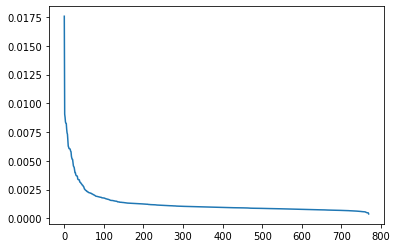

In [27]:
0.0001=0.91/0.6888 (963)
0.0002=0.91/0.6894  (963)
0.0003=0.91/0.6921  (958)
0.0004=0.91/0.6904  (930)
0.0005=0.907/0.68861 (850)
0.0006=0.904/0.6954  (720)
0.0007=0.897/0.6921  (560)
0.0008=0.888/0.6905 (430)
0.0009=0.87/0.68324 (330)
0.001=0.8623/0.685 (260)
plt.plot(sorted(rf.feature_importances_,reverse=True))
plt.show()

In [45]:
pd.Series([2]).iloc[0]

2

In [46]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(data_uncorr['labels']),
                                             data_uncorr['labels']))

w_array = np.ones(labels.shape[0], dtype = 'float')
for i, val in enumerate(labels.values):
    w_array[i] = class_weights[pd.Series(val).iloc[0]]

#data_uncorr['weights']=pd.DataFrame(w_array)


In [50]:
data_uncorr.head(20)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x991,x992,x993,x994,x996,x997,x998,x999,labels,weights
0,-1.840326,1.597233,-1.566715,1.318379,1.224108,0.467427,-0.253549,1.039704,1.633808,4.417618,...,1.888482,-1.162274,-0.364498,3.890447,-2.940528,2.811817,-2.298899,2.524743,1,0.444444
1,0.619528,1.623244,0.278015,0.514886,0.944344,0.104680,0.645978,0.923262,-0.443695,-0.067931,...,-0.477999,0.175075,1.183244,-2.431837,0.129538,-1.352264,0.354308,0.407535,0,2.666667
2,-0.710338,-1.264436,0.194246,1.200533,1.786156,-0.306610,1.386083,0.766600,0.405999,0.296851,...,-0.601606,0.104613,0.093185,-1.634848,1.103551,-0.305443,0.692822,-0.525232,1,0.444444
3,1.385612,-1.332452,-0.861293,-0.241353,-0.711425,-1.639508,0.645802,-0.445964,0.924818,1.404429,...,1.443979,-1.002650,-0.225451,-0.989392,-0.905126,0.439333,-0.309733,1.341058,1,0.444444
4,-0.474465,-0.996560,0.815258,-1.329039,-0.352817,-0.714929,0.945220,-0.614826,-0.872365,-0.628714,...,-1.992644,0.281183,0.657787,-0.810138,0.668942,-0.640241,-0.020962,0.136061,1,0.444444
5,-0.570306,0.401487,0.060972,0.564311,0.691765,0.353283,0.577241,-1.509177,-0.101308,0.523942,...,-0.157772,-0.440683,-0.292502,0.014010,-0.458611,-0.328952,-1.226622,1.038078,1,0.444444
6,-0.069112,-0.232231,-0.271475,0.368670,-0.796288,-0.630317,0.968845,-0.772442,-0.800089,-0.138484,...,-0.617322,0.233952,-0.181850,-0.336739,0.258821,-0.696049,-1.063482,0.097636,2,2.666667
7,-1.139350,-1.051169,-0.652397,0.514123,-1.116970,-1.255850,0.452114,-1.015715,0.971400,0.256993,...,0.809032,0.042813,-1.724772,-0.789810,-0.928686,0.601234,-0.462123,0.826651,1,0.444444
8,-0.046393,1.418786,0.475726,0.111345,-0.005890,0.019823,-2.858472,0.021483,1.215114,2.885537,...,0.617019,-0.442190,-2.620165,1.720000,-0.950180,1.134706,0.343368,-2.298595,1,0.444444
9,0.343145,-0.499824,1.191587,0.953776,0.723424,0.054479,1.450841,-0.009794,0.778659,-0.998707,...,-0.273638,-0.217069,-0.544206,0.005599,0.530326,0.519250,0.431584,0.719751,1,0.444444


,y
0,1
1,0
2,1
3,1
4,1


In [57]:

X=data_uncorr.drop(columns='labels')
y=data_uncorr.labels

skf=StratifiedKFold(10)
folds=skf.split(X,y)
test_scores1=[]
test_scores2=[]
train_scores1=[]
train_scores2=[]

for train_index, test_index in folds:
        x_train=X.values[train_index]
        x_test=X.values[test_index]
        y_train=y.ravel()[train_index]
        y_test=y.ravel()[test_index]
        rf.fit(x_train,y_train)
        sfm=SelectFromModel(rf,prefit=True,threshold=0.0007)
        #training
        x_train_new=sfm.transform(x_train)
        print(x_train_new.shape)
        x_test_new=sfm.transform(x_test)
        svm_model=svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale').fit(x_train_new,y_train)
        xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, sample_weight=w_array).fit(x_train_new,y_train)
        train_preds1=svm_model.predict(x_train_new)
        train_preds2=xgb_model.predict(x_train_new)
        scores1=balanced_accuracy_score(y_train,train_preds1)
        scores2=balanced_accuracy_score(y_train,train_preds2)
        print("fold {}\n TRAIN SCORES:\n SVM:{}\n XGB:{}".format(fold,scores1,scores2))
        train_scores1.append(scores1)
        train_scores2.append(scores2)
        
        #testing
       
        test_preds1=svm_model.predict(x_test_new)
        test_preds2=xgb_model.predict(x_test_new)
        scores1=balanced_accuracy_score(y_test,test_preds1)
        scores2=balanced_accuracy_score(y_test,test_preds2)
        print("TEST SCORES:\n SVM:{}\n XGB:{}".format(scores1,scores2))
        test_scores1.append(scores1)
        test_scores2.append(scores2)
       
        



(4320, 469)
fold 6
 TRAIN SCORES:
 SVM:0.9611111111111111
 XGB:1.0
TEST SCORES:
 SVM:0.8277777777777778
 XGB:0.8277777777777778
(4320, 447)
fold 6
 TRAIN SCORES:
 SVM:0.9598765432098765
 XGB:1.0
TEST SCORES:
 SVM:0.8388888888888889
 XGB:0.8222222222222223
(4320, 479)
fold 6
 TRAIN SCORES:
 SVM:0.954320987654321
 XGB:1.0
TEST SCORES:
 SVM:0.8666666666666666
 XGB:0.8444444444444444
(4320, 457)
fold 6
 TRAIN SCORES:
 SVM:0.9623456790123456
 XGB:1.0
TEST SCORES:
 SVM:0.7999999999999999
 XGB:0.8166666666666668
(4320, 457)
fold 6
 TRAIN SCORES:
 SVM:0.9549382716049383
 XGB:1.0
TEST SCORES:
 SVM:0.8166666666666668
 XGB:0.8166666666666668
(4320, 450)
fold 6
 TRAIN SCORES:
 SVM:0.9561728395061729
 XGB:1.0
TEST SCORES:
 SVM:0.85
 XGB:0.8555555555555556
(4320, 464)
fold 6
 TRAIN SCORES:
 SVM:0.9629629629629629
 XGB:1.0
TEST SCORES:
 SVM:0.8055555555555555
 XGB:0.8277777777777778
(4320, 468)
fold 6
 TRAIN SCORES:
 SVM:0.9635802469135802
 XGB:1.0
TEST SCORES:
 SVM:0.8166666666666668
 XGB:0.79999999

In [ ]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('rf', rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')), 
                         ('sfm',SelectFromModel(rf,prefit=True,threshold=0.0007)), 
                         ('SVM', svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale'))])\



X=data_uncorr.drop(columns='labels')
y=data_uncorr.labels

skf=StratifiedKFold(10)
folds=skf.split(X,y)
test_scores1=[]
test_scores2=[]
train_scores1=[]
train_scores2=[]

for train_index, test_index in folds:
        x_train=X.values[train_index]
        x_test=X.values[test_index]
        y_train=y.ravel()[train_index]
        y_test=y.ravel()[test_index]
        pipe.fit(x_train,y_train)
        train_preds=pipe.predict(x_train)
        train_score=balanced_accuracy_score*

In [80]:
from sklearn.pipeline import Pipeline

X=data_uncorr.drop(columns='labels')
y=data_uncorr.labels


pipe_steps = [('sfm',SelectFromModel(RandomForestClassifier(n_estimators=100,class_weight='balanced'),threshold=0.0007)),('SVM', svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale'))]



pipe_steps = [('sfm',SelectFromModel(RandomForestClassifier(n_estimators=100,class_weight='balanced'),threshold=0.0007)), 
('SVM', svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale'))]
pipeline=Pipeline(pipe_steps)
cross_score = cross_val_score(pipe_steps, X, y, cv=10, scoring='balanced_accuracy', n_jobs=-1, verbose=2)
print(cross_score.mean())

TypeError: estimator should be an estimator implementing 'fit' method, [('sfm', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
                                                 warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold=0.0007)), ('SVM', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))] was passed

In [85]:
pipe_steps = [('sfm',SelectFromModel(RandomForestClassifier(n_estimators=100,class_weight='balanced'),threshold=0.0007)), 
('SVM', svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale'))]

pipeline = Pipeline(pipe_steps)

cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring='balanced_accuracy',n_jobs =-1)
print(cv_scores.mean())
print(cv_scores)

0.6925
[0.68518519 0.71481481 0.72222222 0.67407407 0.68796296 0.71018519
 0.66203704 0.70648148 0.68148148 0.68055556]


In [87]:
pipe_steps = [('sfm',SelectFromModel(RandomForestClassifier(n_estimators=100,class_weight='balanced'),threshold=0.0007)), 
('pca',PCA(n_components = 0.8)),('SVM', svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale'))]

pipeline = Pipeline(pipe_steps)

cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring='balanced_accuracy',n_jobs =-1)
print(cv_scores.mean())
print(cv_scores)

0.6901851851851852
[0.70555556 0.71203704 0.71388889 0.675      0.675      0.70277778
 0.65185185 0.70648148 0.66944444 0.68981481]


In [67]:
#data_uncorr=data_uncorr.drop(columns='weights')]
data_uncorr.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x990,x991,x992,x993,x994,x996,x997,x998,x999,labels
0,-1.840326,1.597233,-1.566715,1.318379,1.224108,0.467427,-0.253549,1.039704,1.633808,4.417618,...,-0.425812,1.888482,-1.162274,-0.364498,3.890447,-2.940528,2.811817,-2.298899,2.524743,1
1,0.619528,1.623244,0.278015,0.514886,0.944344,0.104680,0.645978,0.923262,-0.443695,-0.067931,...,0.292772,-0.477999,0.175075,1.183244,-2.431837,0.129538,-1.352264,0.354308,0.407535,0
2,-0.710338,-1.264436,0.194246,1.200533,1.786156,-0.306610,1.386083,0.766600,0.405999,0.296851,...,-0.294768,-0.601606,0.104613,0.093185,-1.634848,1.103551,-0.305443,0.692822,-0.525232,1
3,1.385612,-1.332452,-0.861293,-0.241353,-0.711425,-1.639508,0.645802,-0.445964,0.924818,1.404429,...,1.198557,1.443979,-1.002650,-0.225451,-0.989392,-0.905126,0.439333,-0.309733,1.341058,1
4,-0.474465,-0.996560,0.815258,-1.329039,-0.352817,-0.714929,0.945220,-0.614826,-0.872365,-0.628714,...,-0.239761,-1.992644,0.281183,0.657787,-0.810138,0.668942,-0.640241,-0.020962,0.136061,1


In [68]:
test_data=pd.read_csv("/Users/Cristy/Downloads/task2/X_test.csv")
test_data.drop(columns='id',inplace=True)



std_test_data=test_data.apply(lambda x: (x-x.mean())/x.std())
test_data_uncorr=std_test_data.drop(columns=corr_feats)


X=data_uncorr.drop(columns='labels')
y=data_uncorr.labels


rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf.fit(X,y)
sfm=SelectFromModel(rf,prefit=True,threshold=0.0007)
X_train_new=sfm.transform(X)
X_test_new=sfm.transform(test_data_uncorr)
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, sample_weight=w_array).fit(X_train_new,y)
        
predictions=xgb_model.predict(X_test_new)


out = pd.DataFrame({'id':[float(i) for i in range(0,len(X_test_new))],'y':predictions})
out.to_csv("RFFS_XGB.csv",index=False)



In [73]:


std_test_data=test_data.apply(lambda x: (x-x.mean())/x.std())
test_data_uncorr=std_test_data.drop(columns=corr_feats)


X=data_uncorr.drop(columns='labels')
y=data_uncorr.labels


rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf.fit(X,y)
sfm=SelectFromModel(rf,prefit=True,threshold=0.0007)
X_train_new=sfm.transform(X)
X_test_new=sfm.transform(test_data_uncorr)


pca = PCA(n_components = 0.8)
pca.fit(X_train_new)
train_data_pca = pd.DataFrame(pca.transform(X_train_new))
test_data_pca = pd.DataFrame(pca.transform(X_test_new))


svm_model=svm.SVC(kernel='rbf',class_weight='balanced',gamma='scale').fit(train_data_pca,y)
        

        
predictions=svm_model.predict(test_data_pca)


out = pd.DataFrame({'id':[float(i) for i in range(0,len(X_test_new))],'y':predictions})
out.to_csv("RFFS_pcaSVM.csv",index=False)







In [86]:

std_test_data=test_data.apply(lambda x: (x-x.mean())/x.std())
test_data_uncorr=std_test_data.drop(columns=corr_feats)


X=data_uncorr.drop(columns='labels')
y=data_uncorr.labels

pipeline.fit(X,y)
predictions=pipeline.predict(test_data_uncorr)


out = pd.DataFrame({'id':[float(i) for i in range(0,len(X_test_new))],'y':predictions})
out.to_csv("pipeline_RFFS_SVM.csv",index=False)





